外資10日買超前30名： ['2618', '2891', '2888', '2884', '2609', '2892', '3706', '9105', '2312', '2344', '2890', '2354', '2027', '2610', '2603', '00712', '00637', '2606', '00945', '3231', '00753', '2634', '2206', '6757', '1101', '1504', '2515', '2809', '2332', '2371']
外資10日賣超前30名： ['00878', '2303', '2834', '2330', '2317', '2887', '1402', '00929', '2356', '2382', '2353', '5871', '0050', '2409', '00922', '00713', '2002', '5880', '0056', '3481', '2886', '9904', '2880', '2449', '006208', '2801', '9921', '00919', '2347', '3036']
自營商10日買超前30名： ['00632', '00940', '00637', '00929', '00936', '00882', '00939', '00963', '00673', '00639', '00676', '00633', '2303', '2885', '2890', '00671', '2324', '00964', '2891', '1402', '00648', '2618', '00674', '1605', '00907', '00655', '2105', '00636', '2883', '1102']
自營商10日賣超前30名： ['00878', '0056', '00919', '00943', '00915', '00930', '00932', '00713', '006208', '00715', '00953', '00891', '00830', '00706', '00680', '2888', '00664', '00665', '00646', '00945', '00757', '007

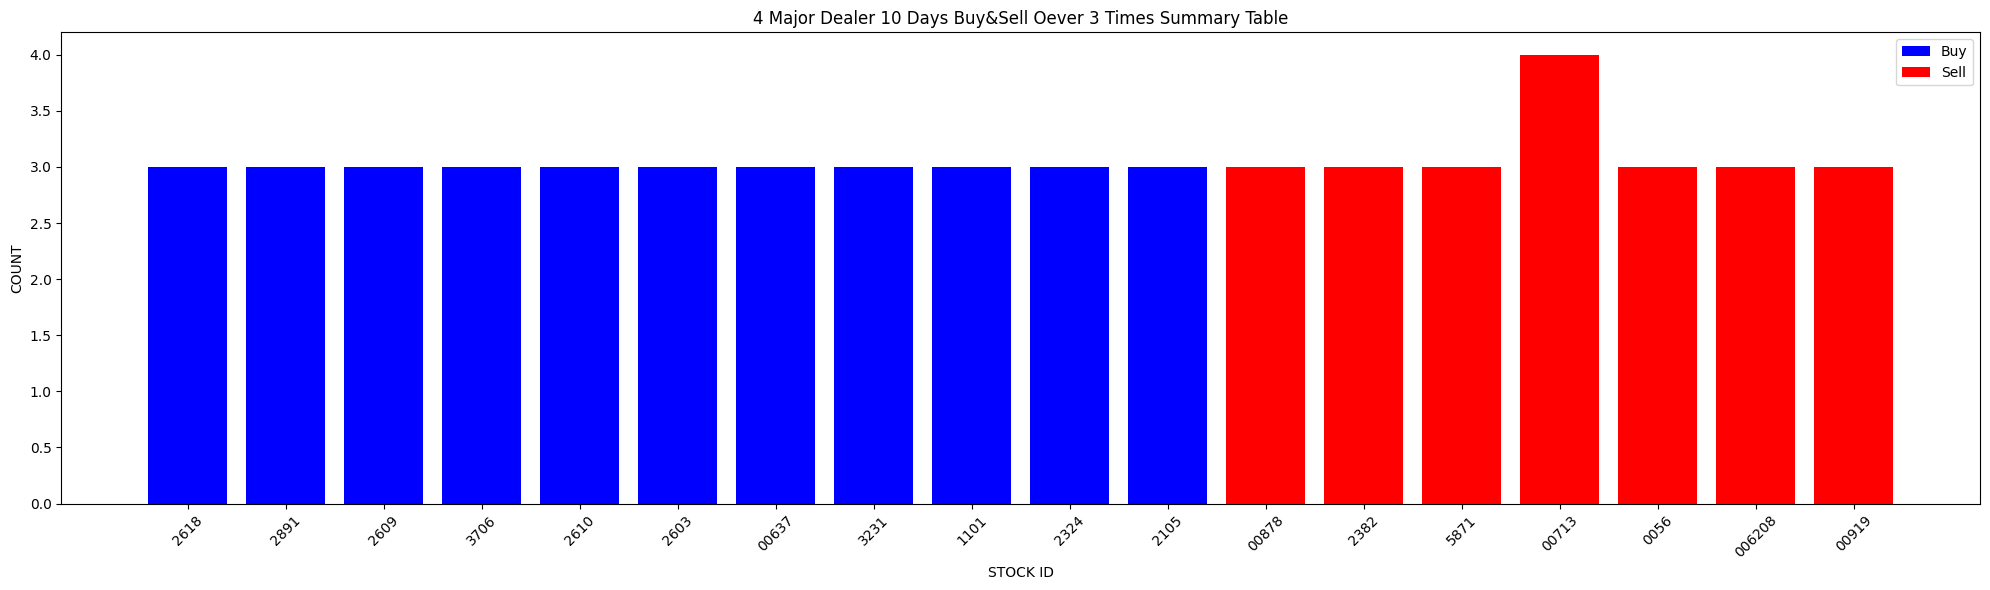

In [1]:
## 從富邦證卷下載四大機構買賣超資料，供作投資參考依據
# 找出買賣超前10名的股票代碼 （測試中。。。。。）
import requests
import json
import re
from bs4 import BeautifulSoup
#url_index = 0 # @param ["0","1","2","3"] {"type":"raw","allow-input":true}
D = 10 # @param ["1","5","10"] {"type":"raw"}
d = 3 # @param ["1","2","3","4","5"] {"type":"raw"}
data_collection_numbers = 60 # @param {"type":"raw"} # 蒐集買賣超筆數
n = data_collection_numbers
# 所有上市公司列表url
urls = [f'https://fubon-ebrokerdj.fbs.com.tw/z/zg/zgk.djhtm?A=D&B=0&C={D}',
       f'https://fubon-ebrokerdj.fbs.com.tw/z/zg/zgk.djhtm?A=DB&B=0&C={D}',
       f'https://fubon-ebrokerdj.fbs.com.tw/z/zg/zgk.djhtm?A=DD&B=0&C={D}',
       f'https://fubon-ebrokerdj.fbs.com.tw/z/zg/zgk.djhtm?A=F&B=0&C={D}']
url_name = ['外資', '自營商', '投信', '主力']
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.5 Safari/605.1.15',
    'Cookie': 'ASPSESSIONIDCSBSTDBR=KFFPFLIBGEPDJJPBBJLCOACO; MoneydjStk=1102',
}

num_buy_list_4 =[]
num_sell_list_4 =[]
for i in range(len(urls)):
  # 取得所有上市公司原始碼
  res = requests.get(url=urls[i], headers=headers)
  res.encoding = 'utf-8'
  res.text
  # 用BeautifulSoup分析HTML
  soup = BeautifulSoup(res.text, 'lxml')

  # 找出td_tag
  td_tag = soup.find_all("td", {"class": "t3t1"}) # 股票代碼

  # Pattern to match digits at the beginning of the string
  pattern = r"^\d+"
  num_buy_list=[]
  num_sell_list=[]
  # Iterate over the td_tag list

  for j in range(n):
      match = re.search(pattern, td_tag[j].getText())

      if j % 2 == 0:
        num_even = match.group()
        num_buy_list.append(num_even)
      elif j % 2 == 1:
        num_odd = match.group()
        num_sell_list.append(num_odd)
      else:
        print("No number found")

      globals()[f"num_buy_list_{i}"] = num_buy_list
      globals()[f"num_sell_list_{i}"] = num_sell_list

  num_buy_list_4 += globals()[f"num_buy_list_{i}"] # 匯總買超清單
  num_sell_list_4 += globals()[f"num_sell_list_{i}"] # 匯總賣超清單

  print(f'{url_name[i]}{D}日買超前{int(n/2)}名：', globals()[f"num_buy_list_{i}"])
  print(f'{url_name[i]}{D}日賣超前{int(n/2)}名：', globals()[f"num_sell_list_{i}"])
print(f'買超清單匯總共{len(num_buy_list_4)}筆股票代碼：', num_buy_list_4)
print(f'買超清單匯總共{len(num_sell_list_4)}筆股票代碼：', num_sell_list_4)


# Plot
import matplotlib.pyplot as plt
from collections import Counter
buy_count = Counter(num_buy_list_4)
sell_count = Counter(num_sell_list_4)

# Drop elements with count >= d
buy_count = {k: v for k, v in buy_count.items() if v >= d} # create buy_count dict for v>=d
print('匯總【四大機構買超】個股>=',d,'日數統計：', buy_count)
sell_count = {k: v for k, v in sell_count.items() if v >= d}
print('匯總【四大機構賣超】個股>=',d,'日數統計：', sell_count)

# Extract data for plotting
elements_buy = list(buy_count.keys())
frequencies_buy = list(buy_count.values())
elements_sell = list(sell_count.keys())
frequencies_sell = list(sell_count.values())
print('='*100)

# Create a bar plot
plt.figure(figsize=(20, 6))
plt.bar(elements_buy, frequencies_buy, color='blue', label='Buy')
plt.bar(elements_sell, frequencies_sell, color='red', label='Sell')
plt.xlabel("STOCK ID")
plt.ylabel("COUNT")
plt.title(f'4 Major Dealer {D} Days Buy&Sell Oever {d} Times Summary Table')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()